<h1><center>SD 210 : Machine Learning - Classification Trees</center></h1>

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
%run 'tparbressource.py'

### Question 1:

In the regression framework, and to predict numerical or continous values, we switch from using the Classification trees to the Regression trees so the homogeneity measure that we use is the SSE "Sum of Standard Errors".
For each independent variable, the data is split at several split points. At each split point, the "error" between the predicted value and the actual values is squared to get a *SSE. The split point errors across the variables are compared and the variable/point yielding the lowest SSE is chosen as the root node/split point. This process is recursively continued.

### Question 2:

In [4]:
# generate sample data ( N = 456 )
gen_data = rand_checkers(n1=114, n2=114, n3=114, n4=114, sigma=0.1)
gen_data.shape

(448, 3)

In [5]:
# Specify the Classifier model with standard max_depth = 13
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(gen_data[:, 0:2], gen_data[:, 2])
dtc.tree_.max_depth

13

In [6]:
# Visualize the Decision Tree that we got from dtc with graphiz
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("gen_data")

'gen_data.pdf'

In [7]:
# Split the data into train / test set => 20% of the data is used for testing
X_train, X_test, y_train, y_test = train_test_split(
    gen_data[:, 0:2], gen_data[:, 2], test_size=0.2, random_state=43)

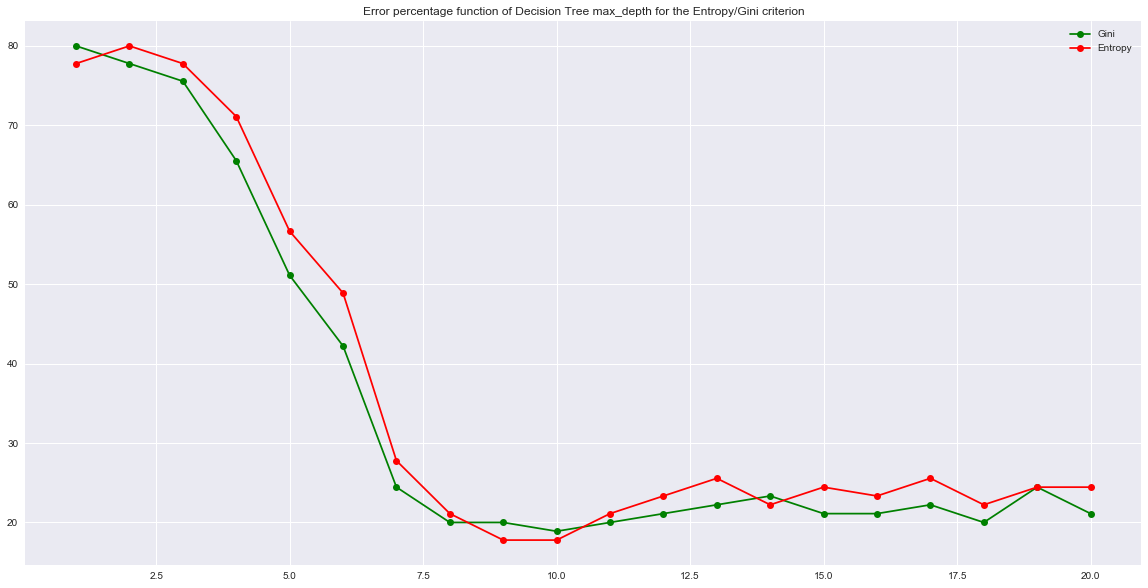

In [8]:
# We fix a maximum depth of 20 for the Decision trees that we are going to use
max_depth = 20
# We perform the calculation of the accuracy of the model for max_depth from 1..20
# For the Gini criterion error
gini_acc = np.array([])
for i in range(1,21):
    # each time we specify a new model with a diffrent max_depth value
    dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=i)
    dtc = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    gini_acc = np.append(gini_acc,dtc.score(X_test, y_test))
plt.plot(range(1,21), (1 - gini_acc)*100, 'o-',color="g")
# Entropy criterion error
entropy_acc = np.array([])
for i in range(1,21):
    # each time we specify a new model with a diffrent max_depth value
    dtc = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    dtc = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    entropy_acc = np.append(entropy_acc,dtc.score(X_test, y_test))
plt.plot(range(1,21), (1 - entropy_acc)*100, 'o-',color="r")
plt.title("Error percentage function of Decision Tree max_depth for the Entropy/Gini criterion")
plt.legend(["Gini","Entropy"])
plt.show()

### Question 3:

The best max_depth is = 9 with an accuracy of 82.2222222222%


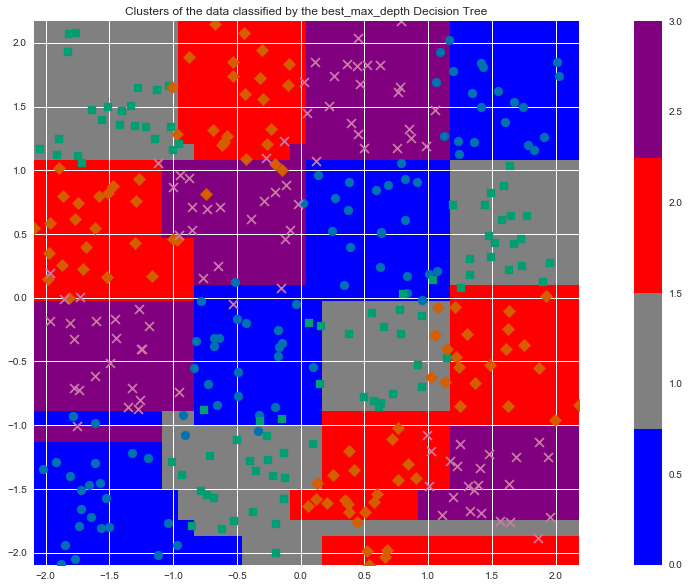

In [9]:
# For the entropy
def bmd(acc_vect):
    '''returns the position of the maximum value of an np.array'''
    return np.argmax(entropy_acc)+1
# get the best max_depth for the entropy criterion
best_max_depth = bmd(entropy_acc)
print("The best max_depth is = " + str(best_max_depth) +
      " with an accuracy of " + str(np.max(entropy_acc) * 100) + "%")
# Create the classifier with the best max_depth
dtc = tree.DecisionTreeClassifier(
    criterion="entropy", max_depth=best_max_depth)
dtc = dtc.fit(X_train, y_train)
# entropy_dtc = dtc.tree_
# y_pred = dtc.predict(X_test)

# Display the classifier obatained
plot_2d(X_train, y_train)
frontiere(dtc.predict, X_train)
plt.title("Clusters of the data classified by the best_max_depth Decision Tree")
plt.show()

### Question 4:

In [10]:
# Export the Classification tree with the best max_depth for the entropy criterion
dot_data = tree.export_graphviz(dtc, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("gen_data_best_md")

'gen_data_best_md.pdf'

### Question 5:

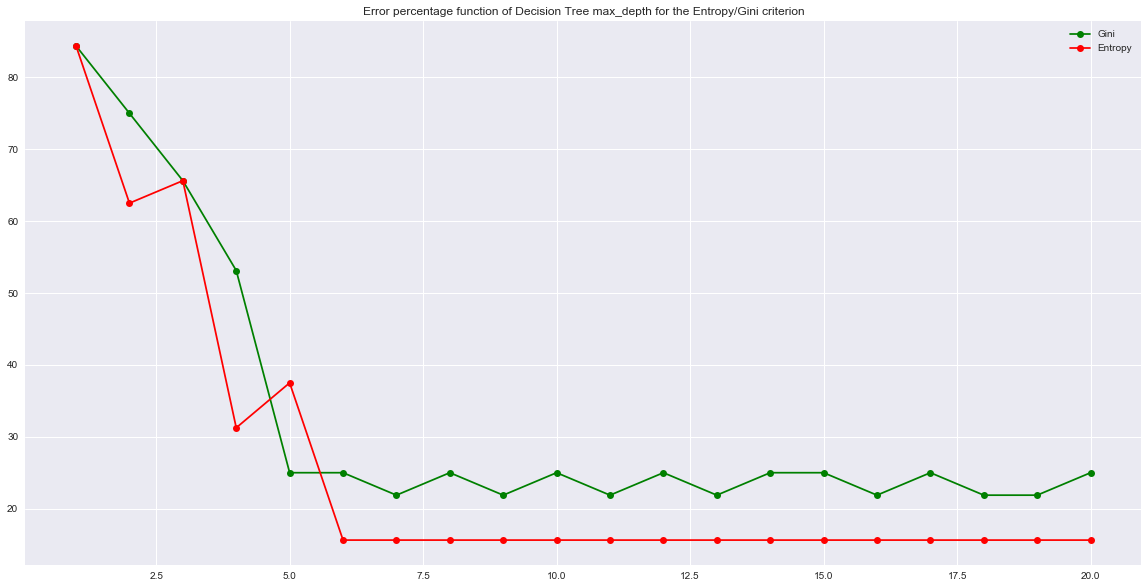

In [11]:
# new data composed of 160 samples base on the decision tree of the question 2
data_q5 = rand_checkers(n1=40, n2=40, n3=40, n4=40, sigma=0.1)
# Split the data into train / test set => 20% of the data is used for testing
X_train, X_test, y_train, y_test = train_test_split(
    data_q5[:, 0:2], data_q5[:, 2], test_size=0.2, random_state=43)

# Compute the accuracy of the DT for diffrent depths and then plot the
# error curve for both criterion `gini` and `entropy`
max_depth = 20
# Gini criterion error
gini_acc = np.array([])
for i in range(1, 21):
    # each time we specify a new model with a diffrent max_depth value
    dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=i)
    dtc = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    gini_acc = np.append(gini_acc, dtc.score(X_test, y_test))
plt.plot(range(1, 21), (1 - gini_acc) * 100, 'o-',color="g")

# Entropy criterion error
entropy_acc = np.array([])
for i in range(1, 21):
    # each time we specify a new model with a diffrent max_depth value
    dtc = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    dtc = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    entropy_acc = np.append(entropy_acc, dtc.score(X_test, y_test))
plt.plot(range(1, 21), (1 - entropy_acc) * 100, 'o-',color="r")
plt.title("Error percentage function of Decision Tree max_depth for the Entropy/Gini criterion")
plt.legend(["Gini", "Entropy"])
plt.show()

The more data we have the less depth we need to fit all the data in the decision tree, we can see that for the entropy criterion the depth doesn't change from 6 because we don't reach this value (so max_depth that we can reach is 6 for this data). Furthermore, we can say that the depth of the tree is corrolated with the size of the dataset, this can lead to overfitting if the dataset is huge so we need to be careful when using the Classification trees for large datasets.

The best max_depth is = 6 with an accuracy of 84.375%


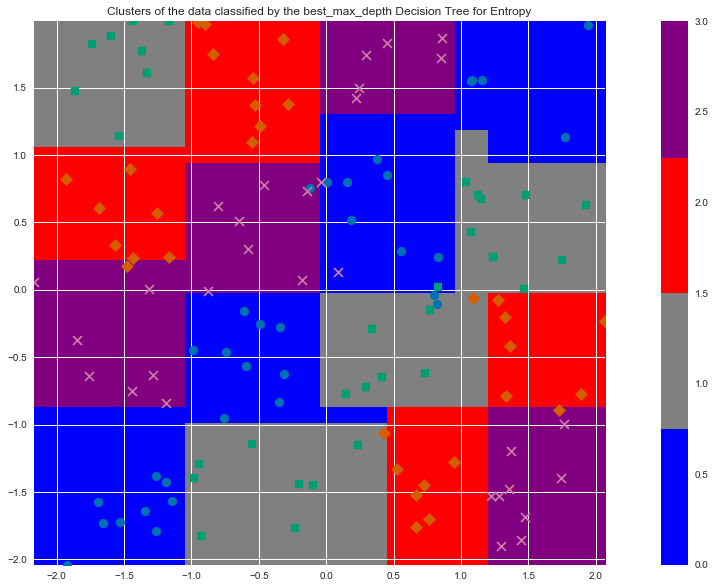

6

In [12]:
# Entropy
best_max_depth = bmd(entropy_acc)
print("The best max_depth is = " + str(best_max_depth) +
      " with an accuracy of " + str(np.max(entropy_acc) * 100) + "%")
dtc = tree.DecisionTreeClassifier(
    criterion="entropy", max_depth=best_max_depth)
dtc = dtc.fit(X_train, y_train)
plot_2d(X_train, y_train)
frontiere(dtc.predict, X_train)
plt.title("Clusters of the data classified by the best_max_depth Decision Tree for Entropy")
plt.show()
best_max_depth

The best max_depth is = 6 with an accuracy of 78.125%


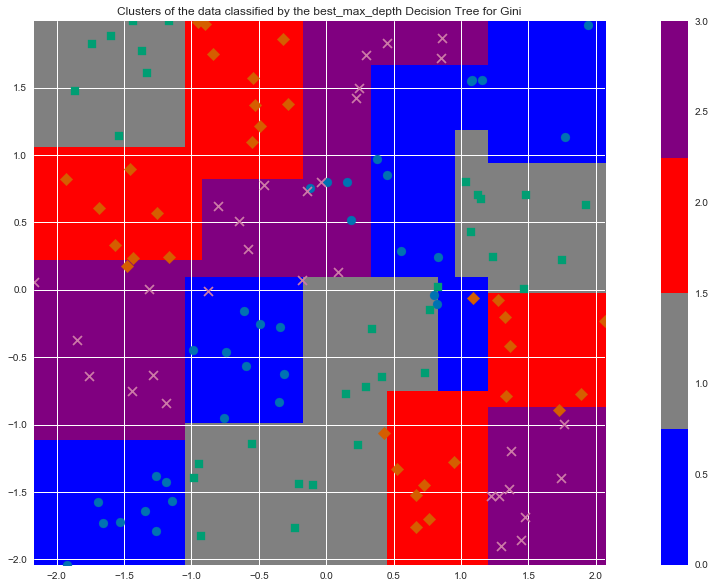

In [13]:
# Gini Criterion
best_max_depth = bmd(gini_acc)
print("The best max_depth is = " + str(best_max_depth) +
      " with an accuracy of " + str(np.max(gini_acc) * 100) + "%")
dtc = tree.DecisionTreeClassifier(
    criterion="gini", max_depth=best_max_depth)
dtc = dtc.fit(X_train, y_train)
plot_2d(X_train, y_train)
frontiere(dtc.predict, X_train)
plt.title("Clusters of the data classified by the best_max_depth Decision Tree for Gini")
plt.show()
# print(gini_acc)
# print(entropy_acc)

### Question 6:

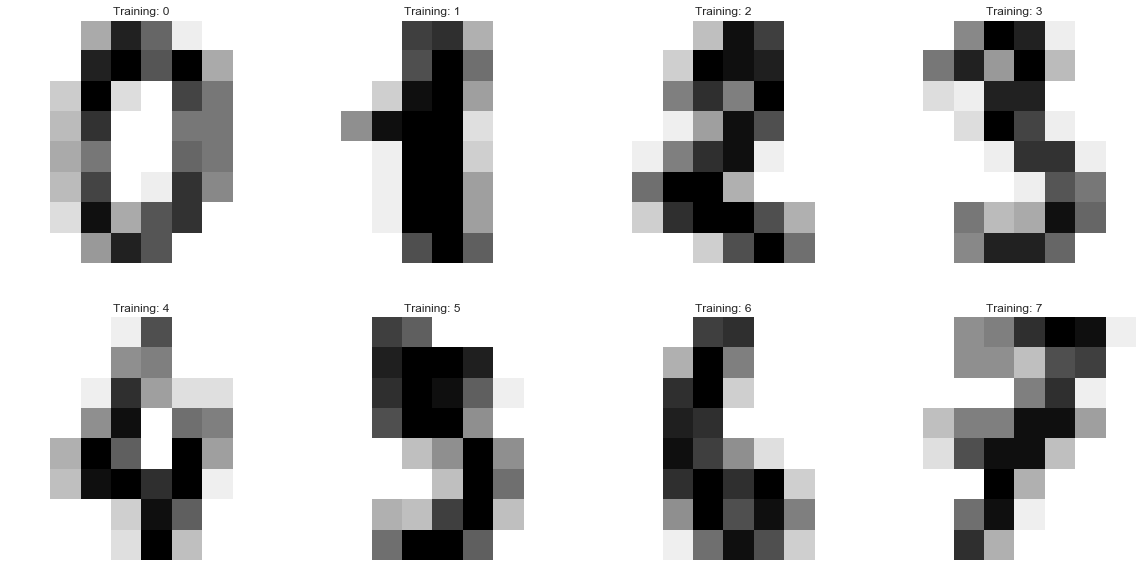

In [14]:
from sklearn import datasets
# Loading the dataset
digits = datasets.load_digits()
clf = tree.DecisionTreeClassifier()

img_label = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(img_label[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    
# digits.data represents the flatenned representation of the 8x8 handwritten numbers
plt.show()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=43)

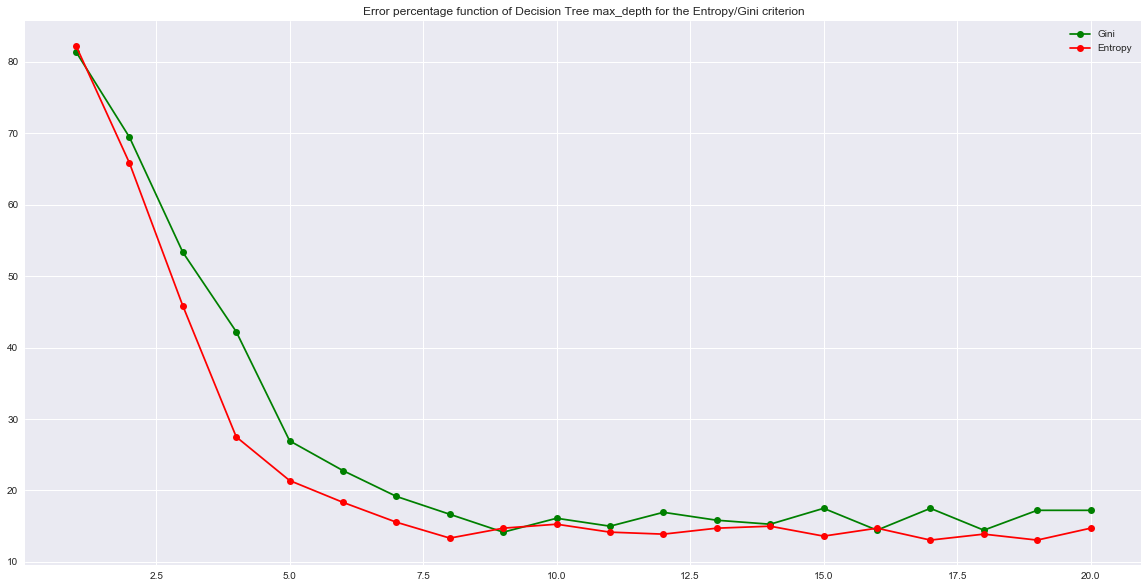

In [15]:
max_depth = 20
# We perform the calculation of the accuracy of the model for max_depth from 1..20
# For the Gini criterion error
gini_acc = np.array([])
for i in range(1, 21):
    clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=i)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    gini_acc = np.append(gini_acc, clf.score(X_test, y_test))
    
plt.plot(range(1, 21), (1 - gini_acc) * 100, 'o-',color="g")

# Entropy criterion error
entropy_acc = np.array([])
for i in range(1, 21):
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    entropy_acc = np.append(entropy_acc, clf.score(X_test, y_test))

plt.plot(range(1, 21), (1 - entropy_acc) * 100, 'o-',color="r")

plt.title("Error percentage function of Decision Tree max_depth for the Entropy/Gini criterion")
plt.legend(["Gini", "Entropy"])
plt.show()

In [16]:
# For the entropy we get the best classification tree (best max_depth)
best_max_depth = bmd(entropy_acc)
print("The best max_depth is = " + str(best_max_depth) +
      " with an accuracy of " + str(np.max(entropy_acc) * 100) + "%")
clf = tree.DecisionTreeClassifier(
    criterion="entropy", max_depth=best_max_depth)
clf = clf.fit(X_train, y_train)

The best max_depth is = 17 with an accuracy of 86.9444444444%


In [17]:
# Visualize the decision tree with the best precision score
digits_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(digits_data)
graph.render("digits_data_best_md")

'digits_data_best_md.pdf'

<h3>Test the accuracy of the obtained model (trained with the digits dataset provided by sklearn) on a similarly formatted dataset</h3>

We load a similar dataset so that we can test our model.
The dataset used can be found <a href=""https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra"">here</a>

In [18]:
import urllib
# Testing the model on another dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra"
raw_data = urllib.request.urlopen(url)
digi = np.genfromtxt(raw_data, delimiter=',')
xx, yy = digi[:, :-1], digi[:, -1:].squeeze()
xx.shape, yy.shape
pred = clf.predict(xx)

Here we are going to visualize some of the prediction associated with the image provided (to predict) some values are wrong (but overall we get a model that have a precision over 82%)

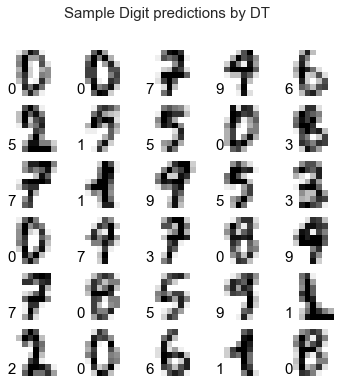

The accuracy of the decision tree is  = 82.5529688726%


In [19]:
# A sample of the prediction vector associated with the images
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Sample Digit predictions by DT', fontsize=15, alpha=2)
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(xx[i, :].reshape(8, 8), cmap=plt.cm.binary)
    ax.text(-1, 7, pred[i].astype(int), fontsize=15, color='black', alpha=2)
plt.show()
print("The accuracy of the decision tree is  = " + str(clf.score(xx,yy)*100)+"%")

### Question 7:

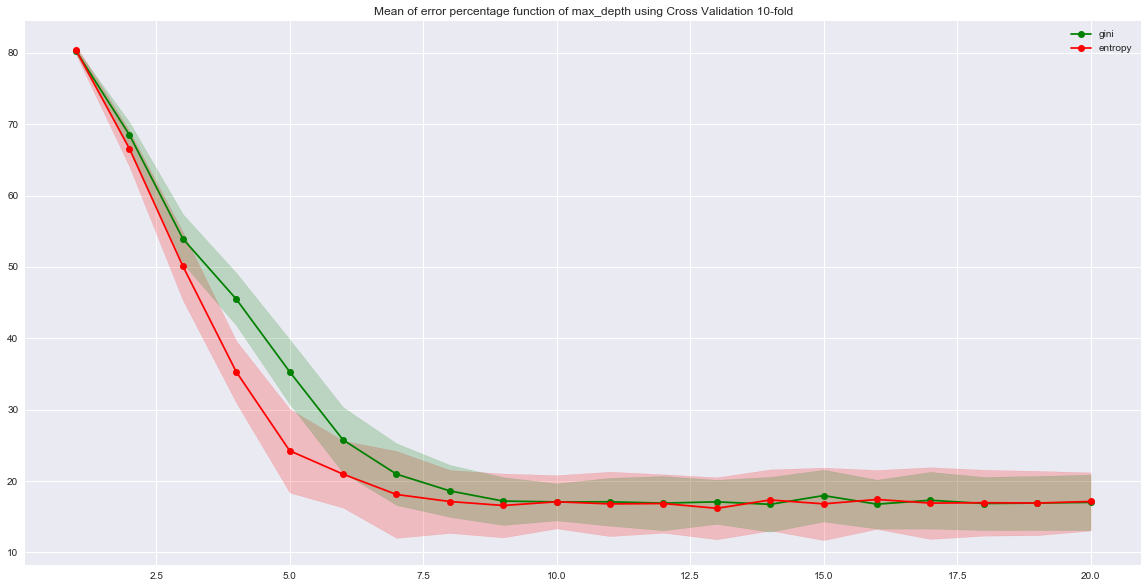

In [20]:
from sklearn.model_selection import cross_val_score

cv_acc_mean_gini = np.array([])
cv_acc_mean_entropy = np.array([])
cv_acc_std_gini = np.array([])
cv_acc_std_entropy = np.array([])

max_depth = 20
for i in range(1, 21):
    clf_gini = tree.DecisionTreeClassifier(criterion="gini", max_depth=i)
    clf_entropy = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    scores_gini = cross_val_score(clf_gini, digits.data, digits.target, cv=10)
    scores_entropy = cross_val_score(
        clf_entropy, digits.data, digits.target, cv=10)
    cv_acc_mean_gini = np.append(cv_acc_mean_gini, np.mean(scores_gini))
    cv_acc_mean_entropy = np.append(
        cv_acc_mean_entropy, np.mean(scores_entropy))
    # for the representation of the standard deviation evolution with max_depth
    cv_acc_std_gini = np.append(cv_acc_std_gini, np.std(scores_gini))
    cv_acc_std_entropy = np.append(cv_acc_std_entropy, np.std(scores_entropy))
    
    
plt.plot(range(1, 21), (1 - cv_acc_mean_gini) * 100, 'o-', color="g")
plt.plot(range(1, 21), (1 - cv_acc_mean_entropy) * 100, 'o-', color="r")

plt.fill_between(range(1, 21), ((1 - cv_acc_mean_entropy) - cv_acc_std_entropy) * 100,
                 ((1 - cv_acc_mean_entropy) + cv_acc_std_entropy) * 100, alpha=0.2, color="r")
plt.fill_between(range(1, 21), ((1 - cv_acc_mean_gini) - cv_acc_std_gini) * 100,
                 ((1 - cv_acc_mean_gini) + cv_acc_std_gini) * 100, alpha=0.2, color="g")
plt.legend(["gini", "entropy"])
plt.title(
    "Mean of error percentage function of max_depth using Cross Validation 10-fold")
plt.show()
# plt.plot(range(1,21),cv_acc_std_gini)
# plt.plot(range(1,21), cv_acc_std_entropy)
# plt.legend(["gini", "entropy"])
# plt.title("STD of error percentage function of max_depth using Cross Validation 10-fold")
# plt.show()

In [21]:
bmd_gini = bmd(cv_acc_mean_gini)
print("The best max_depth is = " + str(bmd_gini) +
      " with an accuracy of " + str(np.max(cv_acc_mean_gini) * 100) + "%" + " and a standard deviation of " + str(cv_acc_std_gini[bmd_gini]))
bmd_entropy = bmd(cv_acc_mean_entropy)
print("The best max_depth is = " + str(bmd_entropy) +
      " with an accuracy of " + str(np.max(cv_acc_mean_entropy) * 100) + "%" + " and a standard deviation of " + str(cv_acc_std_entropy[bmd_entropy]))

clf_gini = tree.DecisionTreeClassifier(criterion="gini", max_depth=bmd_gini)
clf_entropy = tree.DecisionTreeClassifier(
    criterion="entropy", max_depth=bmd_entropy)

The best max_depth is = 17 with an accuracy of 83.2664740887% and a standard deviation of 0.0372154306162
The best max_depth is = 17 with an accuracy of 83.8212335589% and a standard deviation of 0.0461494936874


### Question 8:

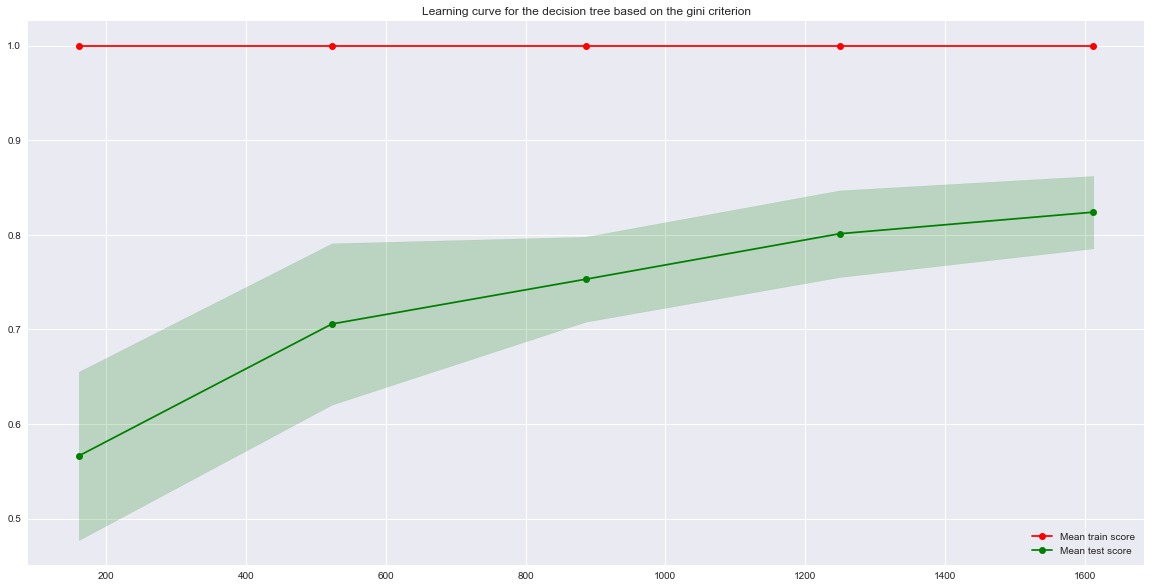

In [22]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    clf_gini, digits.data, digits.target, cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g")
plt.legend(["Mean train score", "Mean test score"], loc=4)
plt.title("Learning curve for the decision tree based on the gini criterion")
plt.show()

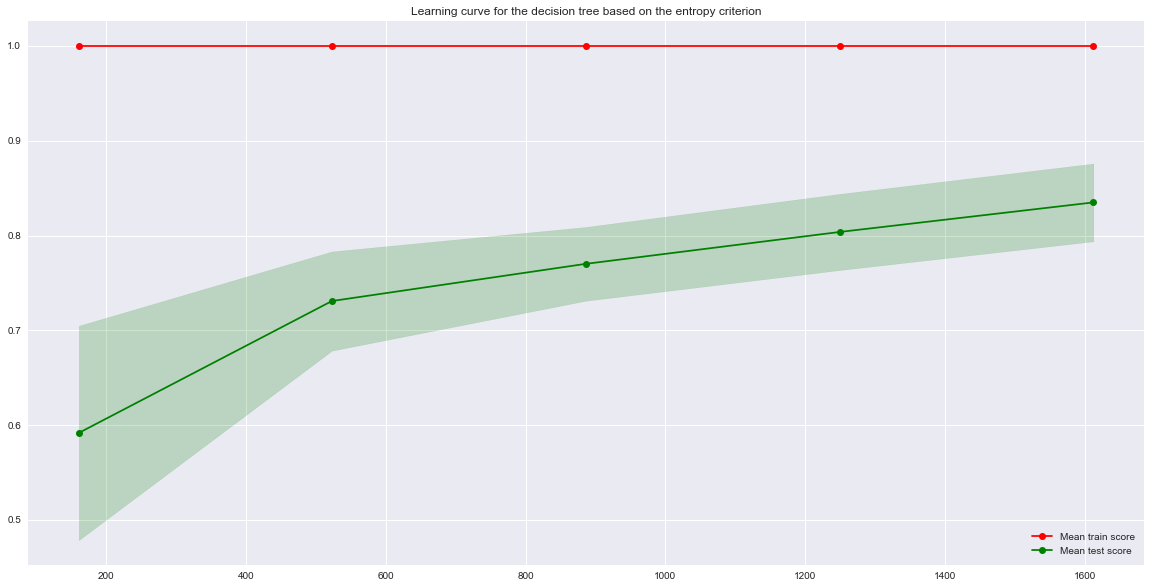

In [23]:
train_sizes, train_scores, test_scores = learning_curve(
    clf_entropy, digits.data, digits.target, cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g")
plt.legend(["Mean train score", "Mean test score"], loc=4)
plt.title("Learning curve for the decision tree based on the entropy criterion")
plt.show()